In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import csv

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [111]:
house_train = pd.read_csv('D:/NYC-Data-Science/Projects/HousingPricesML/Data/train_120feats_Dense_OutlierFree_LogTransform.csv')
# house_train = house_train.drop("Unnamed: 0", axis = 1)
# house_train

In [112]:
X = house_train.loc[:, house_train.columns != 'SalePrice']
y = house_train.SalePrice

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
def EN_func(alpha, l1_ratio):
    val = cross_val_score(ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state = 42),
                         X_train,y_train, cv=5).mean()
    return val

In [115]:
def rf_func(n_estimators, max_depth):
    val = cross_val_score(RandomForestRegressor(n_estimators = int(n_estimators),
                                               max_depth = int(max_depth),
                                               random_state = 42),
                         X_train, y_train, cv=5).mean()
    return val

In [116]:
def krr_func(alpha, degree, coef0):
    val = cross_val_score(KernelRidge(alpha=alpha, kernel='polynomial', degree=degree, coef0=coef0),
                         X_train, y_train, cv=5).mean()
    return val

In [117]:
def xgb_func(n_estimators, max_depth, min_child_weight):
    val = cross_val_score(XGBRegressor(n_estimators=int(n_estimators), max_depth=int(max_depth), 
                                      gamma = gamma, min_child_weight = min_child_weight, learning_rate = 0.05),
                          X_train, y_train, cv = 5, n_jobs = 3).mean()
    return val

In [118]:
# def svr_func(C, gamma, cache_size):
#     val = cross_val_score(SVR(C=C, gamma=gamma, cache_size=cache_size, max_iter=-1),
#                          X_train, y_train, cv=5).mean()
#     return val

In [119]:
def gb_func(n_estimators, max_depth, max_features, min_samples_leaf):
    val = cross_val_score(GradientBoostingRegressor(n_estimators = int(n_estimators),
                                                    max_depth=int(max_depth),
                                                    max_features = int(max_features),
                                                    min_samples_leaf = int(min_samples_leaf),
                                                    random_state = 42, learning_rate = .05),
                          X_train, y_train, cv = 5).mean()
    return val

In [120]:

# ################################
# # Setting Up Gradient Boosting #
# ################################

# def gradBoostCV(n_estimators, max_depth, max_features, min_samples_leaf):
#     val = cross_val_score(GradientBoostingRegressor(
#     n_estimators = int(n_estimators), max_depth = int(max_depth), max_features = int(max_features), min_samples_leaf = int(min_samples_leaf),
#         random_state = 42, learning_rate = 0.05
#     ),X_train, Y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = 3).mean()
#     return val

# gradBoostBaye = BayesianOptimization(gradBoostCV, {
#     'n_estimators': (100, 10000),
#     'max_depth': (1,15),
#     "max_features": (1,65),
#     'min_samples_leaf': (5,10)
# })

In [121]:
def rmse(y_true,y_pred):
   assert len(y_true) == len(y_pred)
   return np.square((y_pred + 1) - (y_true + 1)).mean() ** 0.5

In [122]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="mean_squared_error", cv = 10))
    return(rmse)

In [ ]:
elastic_BO = BayesianOptimization(EN_func, {"alpha":(1e-4,20), "l1_ratio":(0,1)})
elastic_BO.explore({"alpha":np.linspace(1e-4,20,30), 'l1_ratio':np.linspace(0,1,30)})
elastic_BO.maximize(n_iter=30)
print(elastic_BO.res['max'])

In [123]:
estimator = ElasticNet(alpha = 0.0054744052874657282,
                                  l1_ratio = 0.15785598953142266,
                                  random_state=42)
estimator.fit(X_train,y_train)

ElasticNet(alpha=0.005474405287465728, copy_X=True, fit_intercept=True,
      l1_ratio=0.15785598953142266, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
elastic_BO = BayesianOptimization(EN_func, {"alpha":(1e-4,1), "l1_ratio":(0,.5)})
elastic_BO.explore({"alpha":np.linspace(1e-4,1,30), 'l1_ratio':np.linspace(0,.5,30)})
elastic_BO.maximize(n_iter=30)
print(elastic_BO.res['max'])

Initialization
------------------------------------------------------
 Step |   Time |      Value |     alpha |   l1_ratio | 
    1 | 00m00s |    0.91195 |    0.0001 |     0.0000 | 
    2 | 00m00s |    0.90956 |    0.0346 |     0.0172 | 
    3 | 00m00s |    0.89925 |    0.0691 |     0.0345 | 
    4 | 00m00s |    0.88733 |    0.1035 |     0.0517 | 
    5 | 00m00s |    0.87477 |    0.1380 |     0.0690 | 
    6 | 00m00s |    0.85998 |    0.1725 |     0.0862 | 
    7 | 00m00s |    0.84716 |    0.2070 |     0.1034 | 
    8 | 00m00s |    0.83452 |    0.2415 |     0.1207 | 
    9 | 00m00s |    0.82314 |    0.2759 |     0.1379 | 
   10 | 00m00s |    0.81048 |    0.3104 |     0.1552 | 
   11 | 00m00s |    0.79576 |    0.3449 |     0.1724 | 
   12 | 00m00s |    0.77796 |    0.3794 |     0.1897 | 
   13 | 00m00s |    0.75701 |    0.4139 |     0.2069 | 
   14 | 00m00s |    0.73959 |    0.4483 |     0.2241 | 
   15 | 00m00s |    0.71959 |    0.4828 |     0.2414 | 
   16 | 00m00s |    0.69838 |    0

In [119]:
estimator = ElasticNet(alpha = 0.00035623679213911001, l1_ratio = 0.48581607682018874)
estimator.fit(X_train,y_train)

ElasticNet(alpha=0.00035623679213911, copy_X=True, fit_intercept=True,
      l1_ratio=0.48581607682018874, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
y_pred = estimator.predict(X_test)
rmse(y_pred,y_test)

0.13576277171183798

In [125]:
#how the team calculated CV
rmse_cv(ElasticNet(alpha = 0.00035623679213911001, l1_ratio = 0.48581607682018874)).mean()

0.10933571952762185

In [ ]:
np.linspace(10,500,20)

In [128]:
rf_BO = BayesianOptimization(rf_func, {'n_estimators': (200,400), 'max_depth': (10,500)})
rf_BO.explore({"n_estimators":np.linspace(200,400,30), 'max_depth':np.linspace(250,450,30)})
rf_BO.maximize(n_iter=30)
print(rf_BO.res['max'])


Initialization
------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   n_estimators | 
    1 | 00m12s |    0.88650 |    250.0000 |       200.0000 | 
    2 | 00m13s |    0.88647 |    256.8966 |       206.8966 | 
    3 | 00m13s |    0.88661 |    263.7931 |       213.7931 | 
    4 | 00m13s |    0.88648 |    270.6897 |       220.6897 | 
    5 | 00m14s |    0.88663 |    277.5862 |       227.5862 | 
    6 | 00m15s |    0.88683 |    284.4828 |       234.4828 | 
    7 | 00m14s |    0.88691 |    291.3793 |       241.3793 | 
    8 | 00m15s |    0.88674 |    298.2759 |       248.2759 | 
    9 | 00m16s |    0.88682 |    305.1724 |       255.1724 | 
   10 | 00m16s |    0.88684 |    312.0690 |       262.0690 | 
   11 | 00m16s |    0.88692 |    318.9655 |       268.9655 | 
   12 | 00m17s |    0.88692 |    325.8621 |       275.8621 | 
   13 | 00m17s |    0.88675 |    332.7586 |       282.7586 | 
   14 | 00m17s |    0.88663 |    339.6552 |       289.65

In [158]:
estimator = RandomForestRegressor(n_estimators= 277, 
                                  max_depth=100,
                                  random_state=42)
estimator.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=277, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [159]:
y_pred = estimator.predict(X_test)
rmse(y_pred,y_test)

0.1499177426262848

In [160]:
rmse_cv(RandomForestRegressor(n_estimators= 277, 
                                  max_depth=100,
                                  random_state = 42)).mean()

0.12921533692741233

In [221]:
feat_importance = list(zip(X_train.columns,estimator.feature_importances_))

In [222]:
feat_importance.sort(key=lambda x: -x[1])

In [223]:
x = [x[0] for x in feat_importance]
y = [y[1] for y in feat_importance]

In [242]:
[i for i in x[:10]]

['OverallQual',
 'GrLivArea',
 'Neighborhood',
 'GarageArea',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'OverallCond',
 'YearBuilt',
 'LotArea',
 'Bath']

In [245]:
plt.plot(range(0,10),y[0:10])
plt.show()

AttributeError: 'NoneType' object has no attribute 'seq'

In [88]:
krr_BO = BayesianOptimization(krr_func, {'alpha':(0,10000), 'degree':(1,5), 'coef0':(0,10000)})
krr_BO.explore({'alpha':np.linspace(.001,1,30), 'degree':np.linspace(1,3,30), 'coef0':np.linspace(7200,7400,30)})
krr_BO.maximize(n_iter=30)
print(krr_BO.res['max'])

Initialization
-----------------------------------------------------------------
 Step |   Time |      Value |     alpha |     coef0 |    degree | 
    1 | 00m00s |    0.91207 |    0.0010 | 7200.0000 |    1.0000 | 
    2 | 00m00s |    0.91513 |    0.0354 | 7206.8966 |    1.0690 | 
    3 | 00m00s |    0.91461 |    0.0699 | 7213.7931 |    1.1379 | 
    4 | 00m00s |    0.91011 |    0.1043 | 7220.6897 |    1.2069 | 
    5 | 00m00s |    0.90388 |    0.1388 | 7227.5862 |    1.2759 | 
    6 | 00m00s |    0.91416 |    0.1732 | 7234.4828 |    1.3448 | 
    7 | 00m00s |    0.91447 |    0.2077 | 7241.3793 |    1.4138 | 
    8 | 00m00s |    0.90929 |    0.2421 | 7248.2759 |    1.4828 | 
    9 | 00m00s | -939.52214 |    0.2766 | 7255.1724 |    1.5517 | 
   10 | 00m00s | -16321.52105 |    0.3110 | 7262.0690 |    1.6207 | 
   11 | 00m00s | -376912.47651 |    0.3455 | 7268.9655 |    1.6897 | 
   12 | 00m00s | -738533.71433 |    0.3799 | 7275.8621 |    1.7586 | 
   13 | 00m00s | -2242431721.53676 |    

In [101]:
rmse_cv(KernelRidge(alpha=0.035448275862068966,degree=1.0689655172413792, coef0=7206.8965517241377)).mean()
# I get the discrepency now! It was because I was getting score based on 20% of my data which i did not use, while others were
# getting the cv from the k-folds and averaging them. I was relying on just the one instance of unknown while they were avg,
# so likely makes sense that for some instances it fits more and others it is 

0.1126622454383744

In [ ]:
# def rmse_cv(model):
#     rmse= np.sqrt(-cross_val_score(model, X1_train, y1_train, scoring="mean_squared_error", cv = 10))
#     return(rmse)

In [102]:
estimator = KernelRidge(alpha=0.035448275862068966,
                       degree=1.0689655172413792,
                       coef0=7206.8965517241377)
estimator.fit(X_train,y_train)

KernelRidge(alpha=0.035448275862068966, coef0=7206.896551724138,
      degree=1.0689655172413792, gamma=None, kernel='linear',
      kernel_params=None)

In [103]:
y_pred = estimator.predict(X_test)
rmse(y_pred,y_test)

0.13625678239082337

In [47]:
xgBoostBaye = BayesianOptimization(xgb_func, {
    'n_estimators': (100, 10000),
    'max_depth': (1,30),
    "gamma": (0,50),
    'min_child_weight': (1,50)
})

In [48]:
xgBoostBaye.maximize(n_iter=15)
print('Final Results')
print('XG Boosting: ', xgBoostBaye.res['max']['max_val'])
print('XG Boosting: ', xgBoostBaye.res['max']['max_params'])

# Final Results
# XG Boosting:  0.913871778588
# XG Boosting:  {'n_estimators': 6697.7370556393898, 'max_depth': 1.0, 'gamma': 0.0, 'min_child_weight': 1.0}

Initialization
---------------------------------------------------------------------------------------------
 Step |   Time |      Value |     gamma |   max_depth |   min_child_weight |   n_estimators | 
    1 | 01m26s |    0.35980 |   28.2401 |     24.2818 |             3.4063 |      4400.2326 | 
    2 | 00m36s |    0.77729 |    3.1392 |     19.0190 |            21.8887 |      2420.8154 | 
    3 | 01m28s |    0.87364 |    0.5463 |      8.8530 |             6.9930 |      8218.4591 | 
    4 | 00m25s |    0.52628 |   15.9661 |     10.6764 |            44.8131 |      2729.4819 | 
    5 | 01m15s |    0.38980 |   25.9891 |     23.2592 |            14.8631 |      6169.8881 | 
Bayesian Optimization
---------------------------------------------------------------------------------------------
 Step |   Time |      Value |     gamma |   max_depth |   min_child_weight |   n_estimators | 
    6 | 00m05s |    0.85584 |    0.0000 |     30.0000 |             1.0000 |       100.0000 | 
    7 | 01m12s 

In [127]:
rmse_cv(XGBRegressor(n_estimators= 6698, max_depth= 1, gamma= 0, min_child_weight= 1)).mean()


0.11414891100476769

In [76]:
estimator = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [77]:
y_pred = estimator.predict(X_test)
rmse(y_pred,y_test)

0.13219130869275977

In [78]:
estimator = KernelRidge(alpha=0.035448275862068966,
                       degree=1.0689655172413792,
                       coef0=7206.8965517241377)
estimator.fit(X_train,y_train)

KernelRidge(alpha=0.035448275862068966, coef0=7206.896551724138,
      degree=1.0689655172413792, gamma=None, kernel='linear',
      kernel_params=None)

In [ ]:
# krr_BO = BayesianOptimization(krr_func, {'alpha':(0,10000), 'degree':(1,5), 'coef0':(0,10000)})
# krr_BO.explore({'alpha':np.linspace(.001,1,30), 'degree':np.linspace(1,3,30), 'coef0':np.linspace(7200,7400,30)})
# krr_BO.maximize(n_iter=30)
# print(krr_BO.res['max'])

#def gb_func(n_estimators, max_depth, max_features, min_samples_leaf):


In [155]:
gb_BO = BayesianOptimization(gb_func, {'n_estimators': (100, 10000),
    'max_depth': (1,15),
    "max_features": (1,65),
    'min_samples_leaf': (5,10)})
gb_BO.explore({'n_estimators': np.linspace(100, 10000,20),
    'max_depth': np.linspace(1,15,20),
    "max_features": np.linspace(1,65,20),
    'min_samples_leaf': np.linspace(5,10,20)})
gb_BO.maximize(n_iter= 30)
print(gb_BO.res['max'])

Initialization
--------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   max_features |   min_samples_leaf |   n_estimators | 
    1 | 00m00s |    0.52206 |      1.0000 |         1.0000 |             5.0000 |       100.0000 | 
    2 | 00m00s |    0.89277 |      1.7368 |         4.3684 |             5.2632 |       621.0526 | 
    3 | 00m01s |    0.91637 |      2.4737 |         7.7368 |             5.5263 |      1142.1053 | 
    4 | 00m03s |    0.92104 |      3.2105 |        11.1053 |             5.7895 |      1663.1579 | 
    5 | 00m05s |    0.91656 |      3.9474 |        14.4737 |             6.0526 |      2184.2105 | 
    6 | 00m11s |    0.91688 |      4.6842 |        17.8421 |             6.3158 |      2705.2632 | 
    7 | 00m17s |    0.91480 |      5.4211 |        21.2105 |             6.5789 |      3226.3158 | 
    8 | 00m16s |    0.91473 |      6.1579 |        24.5789 |             6.8421 |     

In [157]:
estimator = GradientBoostingRegressor(n_estimators=1663,
                       max_depth=3,
                       max_features=11,
                       min_samples_leaf=6)
estimator.fit(X_train,y_train)
# {'n_estimators': 1663.1578947368421, 
# 'max_depth': 3.2105263157894735, 
#     'max_features': 11.105263157894736, 
#         'min_samples_leaf': 5.7894736842105265

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=11,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1663, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [158]:
y_pred = estimator.predict(X_test)
rmse(y_pred,y_test)

0.1401629603742043

In [159]:
rmse_cv(GradientBoostingRegressor(n_estimators=1663,
                       max_depth=3,
                       max_features=11,
                       min_samples_leaf=6)).mean()

0.11204192139475629

In [160]:
# svr_BO = BayesianOptimization(svr_func, {'C':(.001,70), 
#                                          'gamma':(.00002,100),
#                                          'cache_size':(1000,2000)})
# svr_BO.explore({'C':np.linspace(.001,70, 30), 
#                 'gamma':np.linspace(.00002,100,30),
#                 'cache_size': np.linspace(1000,2000,30)})
# svr_BO.maximize(n_iter=30)
# print(svr_BO.res['max'])


In [ ]:
# sns.set()
# cols = ['MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
#        'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
#        'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
#        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
#        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
#        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
#        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
#        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
#        'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea', 'Bedroom',
#        'Kitchen', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
#        'Fireplaces', 'FireplaceQu']
# sns.pairplot(house_train[cols], size = 2.5)
# plt.show();

In [172]:
house_train.columns.values

array(['MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea', 'Bedroom',
       'Kitchen', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'BsmtBath', 'Bath',


In [13]:
sns.heatmap(pd.DataFrame(dict([(null, [null_corr(null, feature) \
                    for feature in features_to_check])\
                    for null in null_values]), index=features_to_check),
                    cmap='bwr_r', vmin=-1, vmax=1, annot=True,
                    annot_kws={'size':7});

NameError: name 'null_values' is not defined

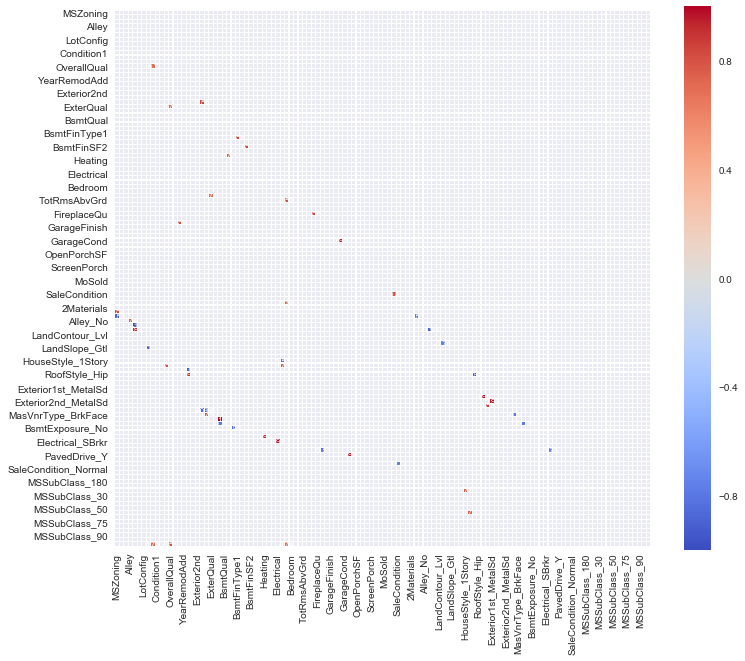

In [25]:
corr =house_train.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            mask = mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

In [52]:
high_corr = corr[((corr >= 0.7) | (corr <= -0.7))]
np.fill_diagonal(high_corr.values, 0)


In [53]:
high_corr[((high_corr >= .7) | (high_corr <= -.7))]

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,Bedroom,Kitchen,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,BsmtBath,Bath,2Materials,MSZoning_RL,MSZoning_RM,Alley_No,LotShape_Reg,LotShape_IR1,LandContour_Lvl,LotConfig_Inside,LotConfig_Corner,LandSlope_Gtl,Condition1_Norm,BldgType_1Fam,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_VinylSd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,MasVnrType_None,MasVnrType_BrkFace,Foundation_PConc,Foundation_CBlock,BsmtExposure_No,BsmtExposure_Av,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_Detchd,PavedDrive_Y,MiscFeature_No,SaleType_WD,SaleCondition_Normal,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_150,SalePrice
MSZoning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.841117,-0.879265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.927077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [155]:
feat_list = []
for row in range(0,len(high_corr)-1):
    for col in range(0,row):
        if np.isnan(high_corr.iat[row,col]):
            pass
        else:
            feat_list.append([row,col])

In [162]:
for row in range(0,len(high_corr)):
    for col in range(0,row):
        if np.isnan(high_corr.iat[row,col]):
            pass
        else:
            print(high_corr.iloc[[row],[col]])

             Neighborhood
OverallQual      0.701538
            MasVnrType
MasVnrArea    0.861859
           OverallQual
ExterQual     0.722245
            BsmtFinType1
BsmtFinSF1      0.849157
            BsmtFinType2
BsmtFinSF2       0.87148
             BsmtCond
TotalBsmtSF  0.723675
             ExterQual
KitchenQual   0.708069
              GrLivArea
TotRmsAbvGrd   0.821125
             Fireplaces
FireplaceQu     0.86199
             YearBuilt
GarageYrBlt   0.840243
            GarageQual
GarageCond    0.949019
               SaleType
SaleCondition  0.795298
      GrLivArea
Bath   0.743207
             MSZoning
MSZoning_RL  0.841117
             MSZoning
MSZoning_RM -0.879265
             MSZoning_RL
MSZoning_RM    -0.806584
             Alley
Alley_No  0.735473
              LotShape
LotShape_Reg      -1.0
              LotShape
LotShape_IR1  0.927077
              LotShape_Reg
LotShape_IR1     -0.927077
                  LotConfig_Inside
LotConfig_Corner         -0.755321
      

In [ ]:
for col in range()

In [156]:
feat_list

[[12, 8],
 [20, 19],
 [21, 12],
 [28, 27],
 [30, 29],
 [32, 25],
 [41, 21],
 [42, 38],
 [45, 44],
 [47, 14],
 [51, 50],
 [63, 62],
 [65, 38],
 [67, 0],
 [68, 0],
 [68, 67],
 [69, 3],
 [70, 4],
 [71, 4],
 [71, 70],
 [74, 73],
 [75, 7],
 [78, 37],
 [79, 11],
 [79, 37],
 [80, 16],
 [81, 16],
 [81, 80],
 [86, 82],
 [87, 84],
 [88, 83],
 [89, 19],
 [89, 20],
 [90, 20],
 [90, 89],
 [91, 23],
 [92, 23],
 [92, 91],
 [93, 26],
 [95, 33],
 [96, 36],
 [98, 46],
 [98, 97],
 [99, 52],
 [101, 63],
 [107, 78],
 [112, 79]]

In [203]:
corr =house_train.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sale_corr = corr["SalePrice"]
# sns.heatmap(corr[119,:], 
#             mask = mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
#             annot=True, annot_kws={"size": 8}, square=True);
# plt.show()

In [204]:
sale_corr = sale_corr
ans = []
for index, val in sale_corr.iteritems():
    ans.append([index,val])

In [28]:
def csv_stacking():
    first = True
    csvfiles = glob.glob('D:/NYC-Data-Science/Projects/HousingPricesML/Predictions/*')
    wf = csv.writer(open('D:/NYC-Data-Science/Projects/HousingPricesML/submission.csv','w'),delimiter=',', lineterminator ='\n')
    for files in csvfiles:
        rd = csv.reader(open(files,'r'), delimiter=',')
    for row in rd:
        print(row)
        wf.writerow(row)

In [99]:
def csv_stacking():
    first = True
    csvfiles = glob.glob('D:/NYC-Data-Science/Projects/HousingPricesML/Predictions/*.csv')
    wf = csv.writer(open('D:/NYC-Data-Science/Projects/HousingPricesML/submission.csv','w'),delimiter=',', lineterminator ='\n')
    for files in csvfiles:
        rd = csv.reader(open(files,'r'), delimiter=',')
        if first:
            first = False
        else:
            next(rd,None)
        for row in rd:
#             print(row)
            wf.writerow(row)

In [106]:
def id_avg():
    csv = pd.read_csv('D:/NYC-Data-Science/Projects/HousingPricesML/submission.csv')
    csv = csv.groupby(csv[csv.columns[0]]).mean()
    csv.to_csv('D:/NYC-Data-Science/Projects/HousingPricesML/submission.csv')

In [107]:
csv_stacking()
id_avg()